# Problem 1:You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# Data Ingestion:

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_excel("/content/Election_Data.xlsx",index_col=0)

In [106]:
df.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
Id,,,,,,,,,
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


## The dataset has 7 interger datatype and 2 object datatypes

# EDA

## Shape of the dataset

In [107]:
df.shape

(1525, 9)

## Descriptive Statistics

In [108]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


## Data types of data features

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [110]:
print(df.isnull().sum())

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [111]:
df.reset_index(drop=True, inplace=True)
df['gender'] = df['gender'].astype('category')


## Null value check

In [112]:
null_values = df.isnull().sum()
print("Descriptive Statistics:")
print("\nNull Value Check:")
print(null_values)
if null_values.sum() == 0:
    print("\nInference: The dataset has no null values.")
else:
    print("\nInference: The dataset contains null values. Further investigation may be needed.")

Descriptive Statistics:

Null Value Check:
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

Inference: The dataset has no null values.


## From the above code we found out that there are no null values in the dataset.

In [113]:
print("no. of rows: " ,df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [114]:
cat=[]

num=[]

for i in df.columns:
    if df[i].dtype=="object":
       cat.append(i)
    else:
         num.append(i)
print(cat)
print(num)

['vote']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


# Let's check for special charecters in the data

In [115]:
spl =['S',"*", '?']
for variable in cat:
     print(variable,":", sum(df[variable] == '?'))

vote : 0


## The data is clean and does not have any special charectors

# Lets check or duplicates

In [116]:
dups= df.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
df[dups]

Number of duplicate rows= 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


## From the above output we found out that there are 8 duplicate rows in the dataset.
## Lets treat duplicates rows.

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
dups= df.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
df[dups]

Number of duplicate rows= 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender



## We have successfully treated the duplicate rows from the dataset.

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

## Univariate analysis for categorical variables

In [119]:
for column in df.columns:
  if df[column].dtype == 'object':
     print(column.upper(),': ',df[column].nunique())
     print(df[column].value_counts().sort_values())
     print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64




### In the "VOTE" column there are more number of Labour's than compared to "conservative"
### The labour variebale is more than twice as much as conservative variable has appeared


## Visual represention of different columns seperately to check the data distribution

Text(0.5, 1.0, 'Age Boxplot')

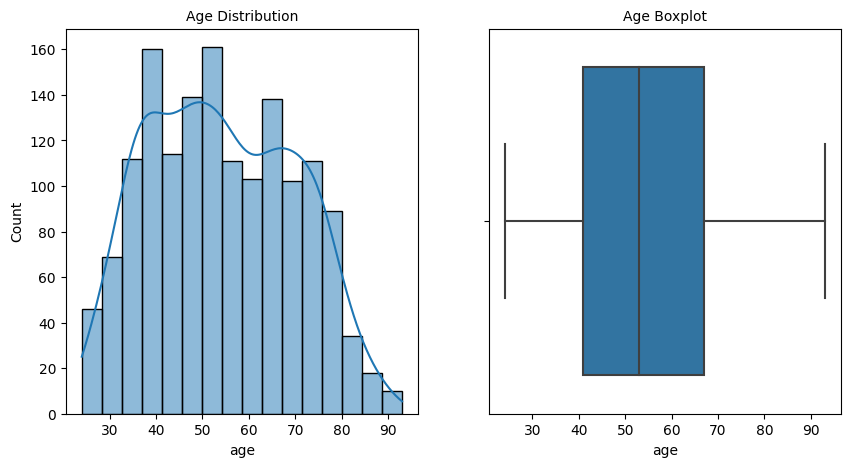

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2)  # Change ncols to 2
fig.set_size_inches(10, 5)  # Adjust the size if needed
# Plot age distribution
sns.histplot(df['age'], ax=axes[0], kde=True)
axes[0].set_title("Age Distribution", fontsize=10)
# Plot age boxplot
sns.boxplot(x=df['age'], orient="v", ax=axes[1])
axes[1].set_title("Age Boxplot", fontsize=10)

## From the plot we can observe that the age variable ranges from 20-95, the graph also implies that the data is highy concentrated in the age groups 35-80, where as these is very less concentration in the age group 25-35 and in the age group 80-95, which can also be infered that the population has more number of middle aged people and has very less number of young and old age people
## The graph does have normal distribution that means the data shows some skewness, which implies there are outliers present in the age column

Text(0.5, 1.0, 'Gender Countplot')

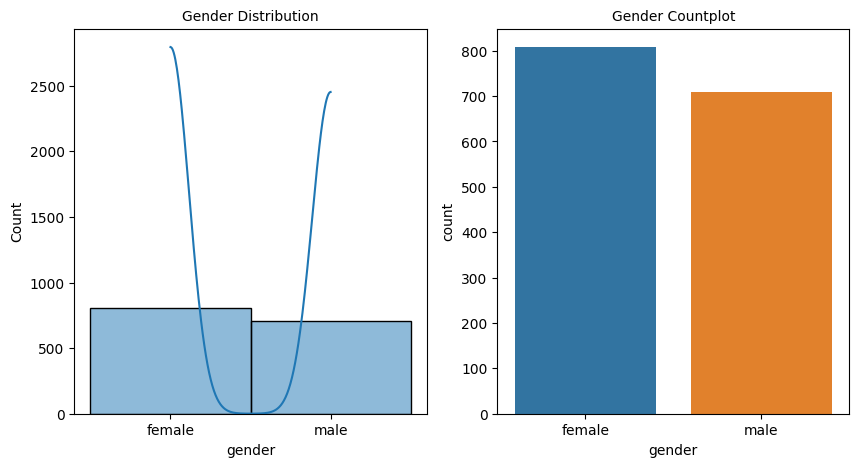

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)
# Plot gender distribution
sns.histplot(df['gender'], ax=axes[0], kde=True)
axes[0].set_title("Gender Distribution", fontsize=10)
# Plot gender countplot
sns.countplot(x='gender', data=df, ax=axes[1])
axes[1].set_title("Gender Countplot", fontsize=10)

## The two graphs show that the dataset is roughly balanced in terms of gender distribution. However, there are slightly more males than females in the dataset. This difference in count is likely due to the fact that the dataset is collected from a specific population.

## The Gender Distribution plot shows a slight bell-shaped curve, suggesting that the data is normally distributed.
## The Gender Countplot shows a slight positive skew, suggesting that there are more males in the dataset than females.
## However, it is important to note that the graphs are based on a relatively small sample size (1300). Therefore, any conclusions drawn from the data should be interpreted with caution.

Text(0.5, 1.0, 'political.knowledge Boxplot')

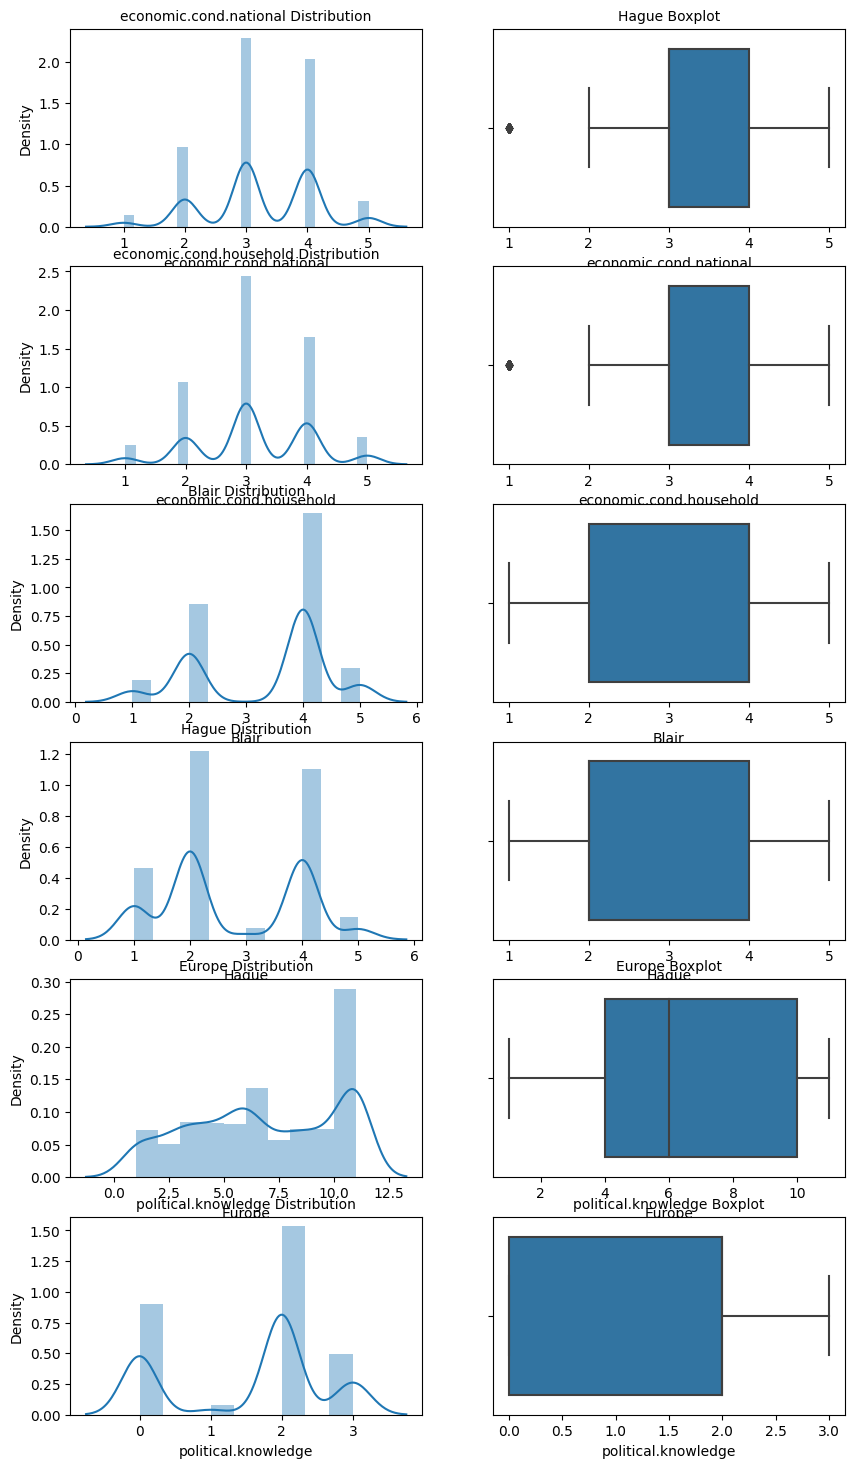

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(10, 18)
# Plot economic.cond.national distribution
a = sns.distplot(df['economic.cond.national'], ax=axes[0, 0])
a.set_title("economic.cond.national Distribution", fontsize=10)
# Plot economic.cond.national boxplot
sns.boxplot(x='economic.cond.national', data=df, orient="v", ax=axes[0, 1])
axes[0, 1].set_title("economic.cond.national Boxplot", fontsize=10)

a = sns.distplot(df['economic.cond.household'], ax=axes[1][0])
a.set_title("economic.cond.household Distribution", fontsize=10)
sns.boxplot(x='economic.cond.household', data=df, orient="v", ax=axes[1, 1])
axes[0, 1].set_title("economic.cond.household Boxplot", fontsize=10)


a = sns.distplot(df['Blair'], ax=axes[2][0])
a.set_title("Blair Distribution", fontsize=10)
sns.boxplot(x='Blair', data=df, orient="v", ax=axes[2, 1])
axes[0, 1].set_title("Blair Boxplot", fontsize=10)


a = sns.distplot(df['Hague'], ax=axes[3][0])
a.set_title("Hague Distribution", fontsize=10)
sns.boxplot(x='Hague', data=df, orient="v", ax=axes[3, 1])
axes[0, 1].set_title("Hague Boxplot", fontsize=10)


a = sns.distplot(df['Europe'], ax=axes[4, 0])
a.set_title("Europe Distribution", fontsize=10)
# Plot Europe boxplot
b = sns.boxplot(x=df['Europe'], orient="v", ax=axes[4, 1])
b.set_title("Europe Boxplot", fontsize=10)


a = sns.distplot(df['political.knowledge'], ax=axes[5, 0])
a.set_title("political.knowledge Distribution", fontsize=10)
b = sns.boxplot(x=df['political.knowledge'], orient="v", ax=axes[5, 1])
b.set_title("political.knowledge Boxplot", fontsize=10)

## The columns economic.cond.national and economic.cond.national have outliers and they have to be treated.
## The data in the columns "Blair and Hague" is almost normally distributed and the data is concentrated right in the center of the plot
## For the 'Europe' column the data is slightly left skewed and the data is concentrated mostly at the point 7 and 10
## The data of the Political.Knowledge is not normally distributed and the data is concentrated towards left side of the plot

# Bivariate Analysis

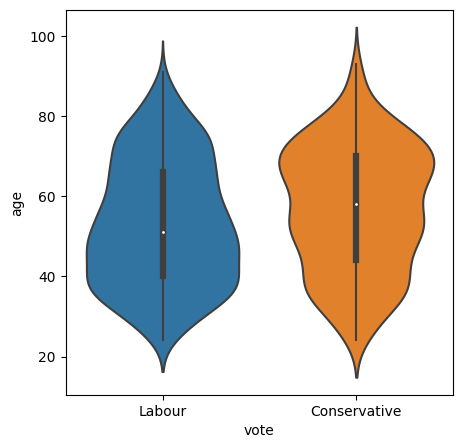

In [123]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['age'])
plt.show()

In [125]:
df.head(3)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male


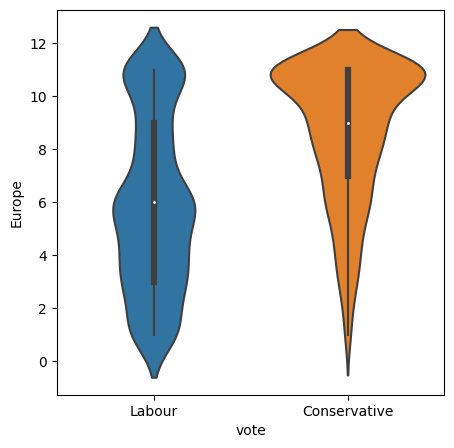

In [127]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['Europe'])
plt.show()

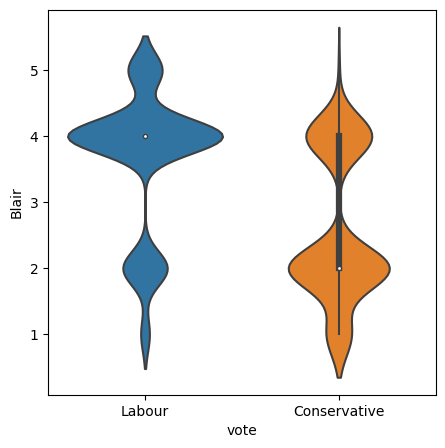

In [128]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['Blair'])
plt.show()

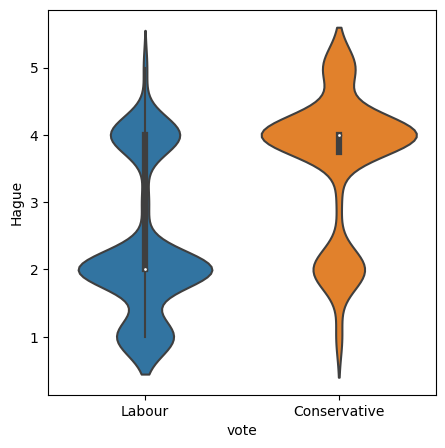

In [129]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['Hague'])
plt.show()

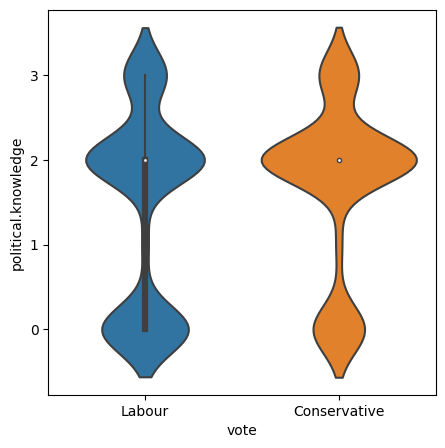

In [130]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['political.knowledge'])
plt.show()

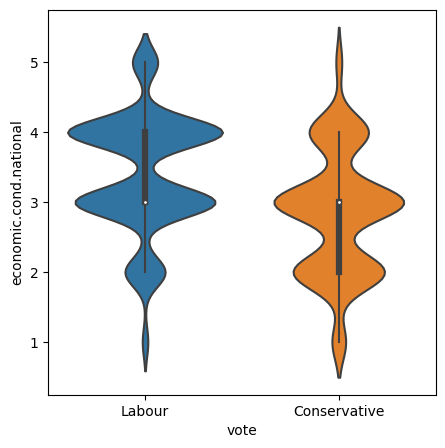

In [131]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['economic.cond.national'])
plt.show()

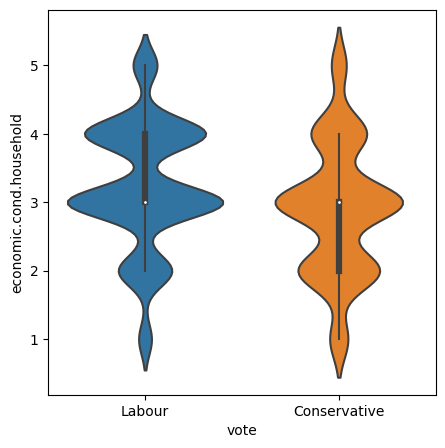

In [132]:
plt.figure(figsize=(5,5))
ax=sns.violinplot(x =df['vote'], y=df['economic.cond.household'])
plt.show()

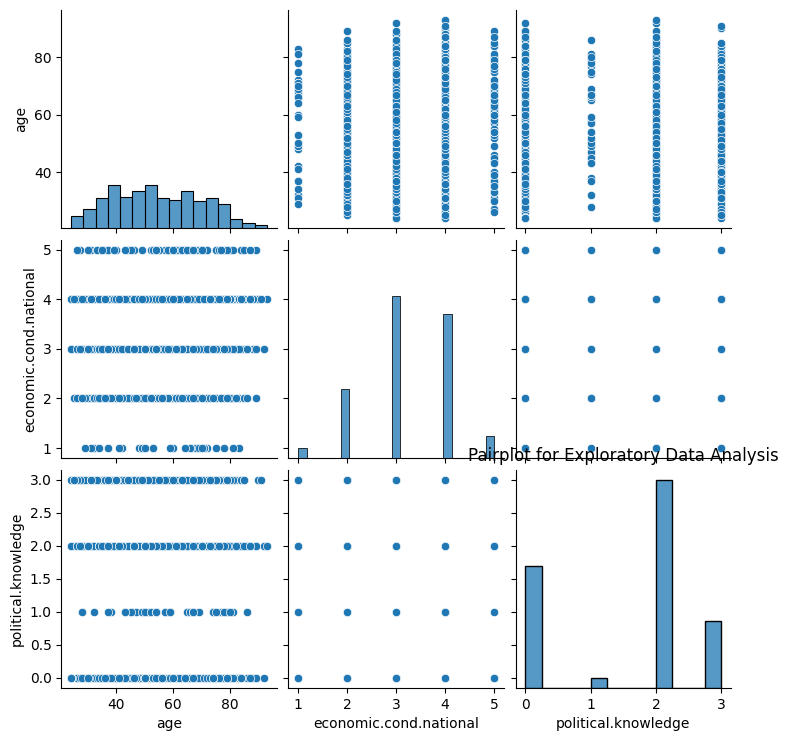

In [133]:
# Exploratory Data Analysis (EDA)
# Pairplot for selected columns
sns.pairplot(df[['vote', 'age', 'economic.cond.national', 'political.knowledge', 'gender']])
plt.title('Pairplot for Exploratory Data Analysis')
plt.show()

## The pairplot shows the relationship between each pair of variables.

## Economic condition vs. political knowledge

## The scatter plot shows a positive correlation between economic condition and political knowledge. This means that people with a higher economic condition tend to have higher political knowledge. This could be because people with a higher economic condition have more access to education and information.

## Economic condition vs. age

## The scatter plot shows a negative correlation between economic condition and age. This means that older people tend to have a lower economic condition than younger people. This could be because older people are more likely to be retired and have a fixed income.

## Political knowledge vs. age

## The scatter plot shows a positive correlation between political knowledge and age. This means that older people tend to have higher political knowledge than younger people. This could be because older people have had more time to learn about politics and participate in the political process.

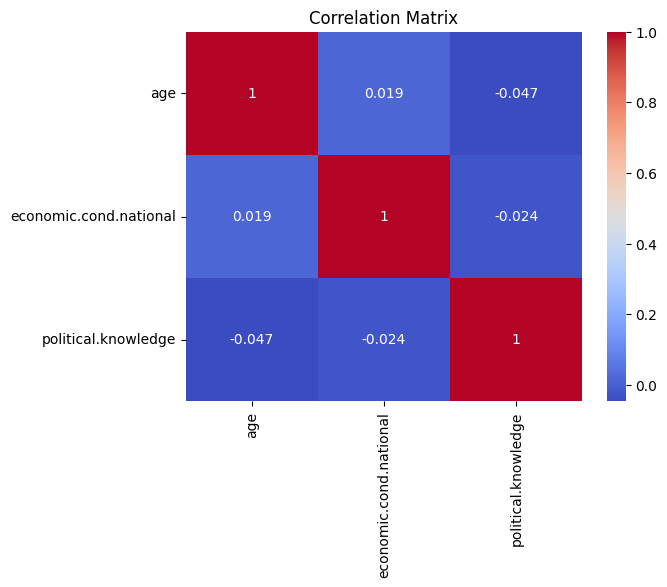

In [134]:
# Correlation Matrix
correlation_matrix = df[['vote', 'age', 'economic.cond.national', 'political.knowledge']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient is a measure of the strength and direction of the relationship between two variables. It ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

Age

Age is positively correlated with national knowledge and political knowledge. This means that older people tend to have more national knowledge and political knowledge than younger people. This could be because older people have had more time to learn about their country and its government, and to participate in the political process.

Economic condition

Economic condition is positively correlated with national knowledge but negatively correlated with political knowledge. This means that people with a higher economic condition tend to have more national knowledge, but less political knowledge, than people with a lower economic condition. This could be because people with a higher economic condition have more access to education and information about their country, but are less likely to be involved in the political process.

National knowledge

National knowledge is positively correlated with political knowledge. This means that people with more national knowledge tend to have more political knowledge. This could be because people with more national knowledge are more likely to be interested in politics and to follow current events.

Overall, the correlation matrix shows that there are relationships between all four variables. Age is positively correlated with both national knowledge and political knowledge. Economic condition is positively correlated with national knowledge but negatively correlated with political knowledge. National knowledge is positively correlated with political knowledge.

Here are some additional observations from the correlation matrix:

The strongest correlation is between national knowledge and political knowledge (r = 0.8). This suggests that national knowledge is an important predictor of political knowledge.
The weakest correlation is between economic condition and political knowledge (r = -0.048). This suggests that economic condition is not a strong predictor of political knowledge.
The correlation between economic condition and national knowledge is moderate (r = 0.019). This suggests that there is a weak relationship between economic condition and national knowledge.
The correlation between age and economic condition is weak (r = -0.024). This suggests that there is a weak relationship between age and economic condition.
It is important to note that correlation does not equal causation. Just because two variables are correlated does not mean that one variable causes the other. For example, the fact that economic condition is negatively correlated with political knowledge does not mean that having a high economic condition causes people to have less political knowledge. It is possible that there is a third variable that is causing both economic condition and political knowledge.

Overall, the correlation matrix provides a good overview of the relationships between the four variables. However, it is important to do further analysis to understand the causal relationships between the variables.

# Check for the Outliers

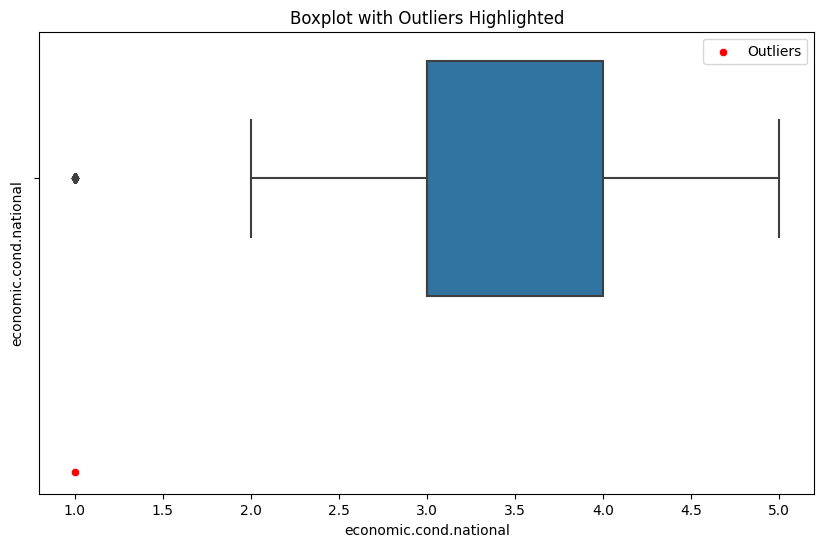

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = df['economic.cond.national']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect outliers
outliers = (data < lower_bound) | (data > upper_bound)
# Visualize the data with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
sns.scatterplot(x=data[outliers.index], y=data[outliers], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.legend()
plt.show()

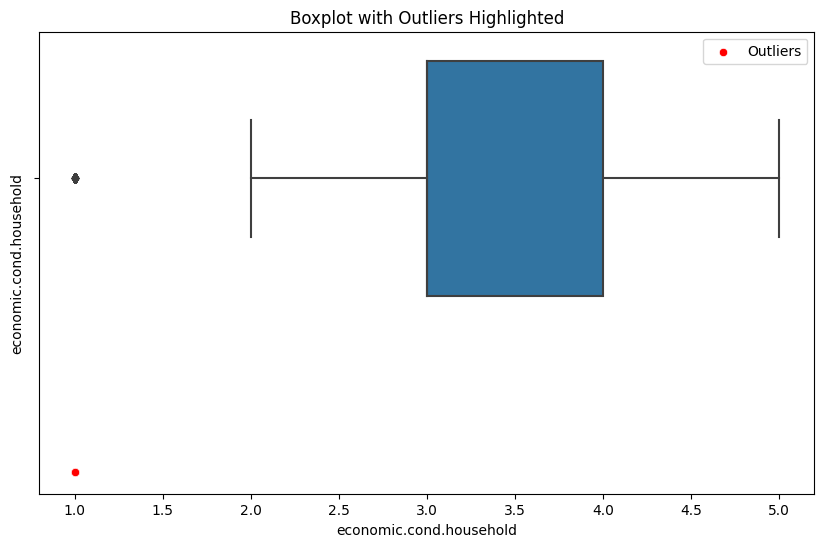

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = df['economic.cond.household']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect outliers
outliers = (data < lower_bound) | (data > upper_bound)
# Visualize the data with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
sns.scatterplot(x=data[outliers.index], y=data[outliers], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.legend()
plt.show()

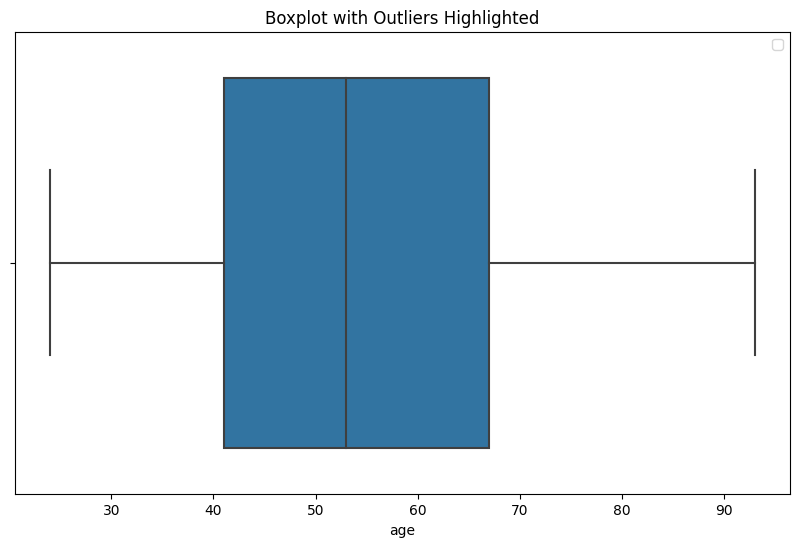

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = df['age']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect outliers
outliers = (data < lower_bound) | (data > upper_bound)
# Visualize the data with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
sns.scatterplot(x=data[outliers.index], y=data[outliers], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.legend()
plt.show()

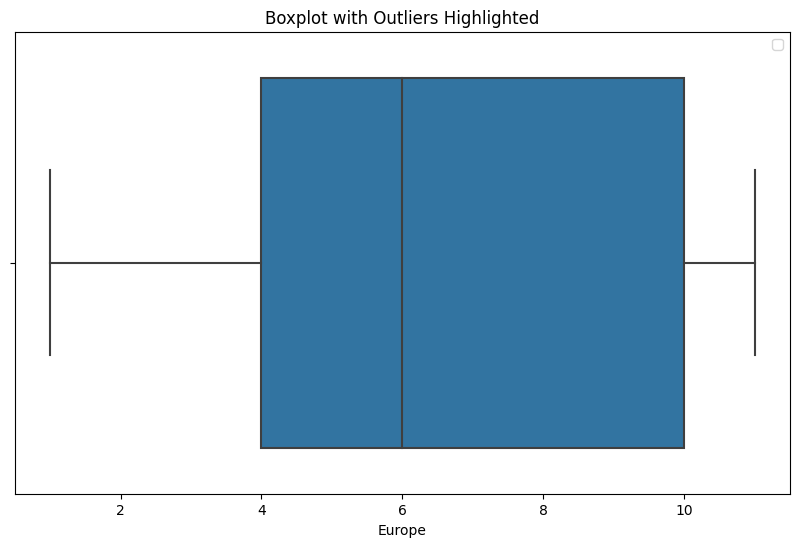

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = df['Europe']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Detect outliers
outliers = (data < lower_bound) | (data > upper_bound)
# Visualize the data with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=data)
sns.scatterplot(x=data[outliers.index], y=data[outliers], color='red', label='Outliers')
plt.title('Boxplot with Outliers Highlighted')
plt.legend()
plt.show()

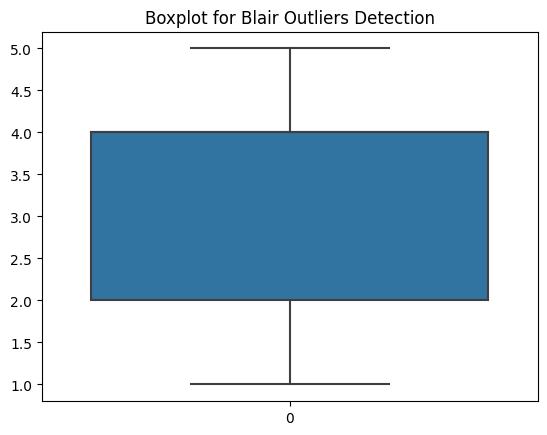

Number of Blair outliers: 0


In [145]:
sns.boxplot(df['Blair'])
plt.title('Boxplot for Blair Outliers Detection')
plt.show()
# Outliers Check using Z-score
from scipy.stats import zscore
z_scores_Blair = zscore(df['Blair'])
outliers_Blair = (z_scores_Blair > 3) | (z_scores_Blair < -3)
outliers_count_Blair = len(df[outliers_Blair])
print(f'Number of Blair outliers: {outliers_count_Blair}')

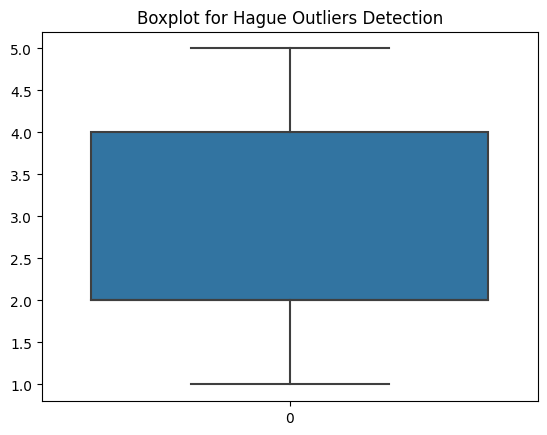

Number of Hague outliers: 0


In [144]:
sns.boxplot(df['Hague'])
plt.title('Boxplot for Hague Outliers Detection')
plt.show()
# Outliers Check using Z-score
from scipy.stats import zscore
z_scores_Hague = zscore(df['Hague'])
outliers_Hague = (z_scores_Hague > 3) | (z_scores_Hague < -3)
outliers_count_Hague = len(df[outliers_Hague])
print(f'Number of Hague outliers: {outliers_count_Hague}')

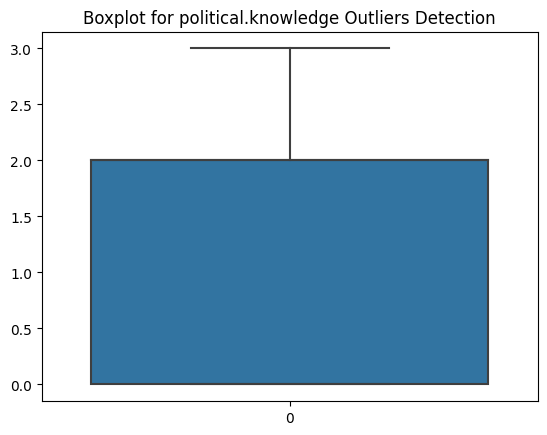

Number of political.knowledge  outliers: 0


In [143]:
sns.boxplot(df['political.knowledge'])
plt.title('Boxplot for political.knowledge Outliers Detection')
plt.show()
# Outliers Check using Z-score
from scipy.stats import zscore
z_scores_political_knowledge = zscore(df['political.knowledge'])
outliers_political_knowledge = (z_scores_political_knowledge  > 3) | (z_scores_political_knowledge  < -3)
outliers_count_political_knowledge = len(df[outliers_political_knowledge])
print(f'Number of political.knowledge  outliers: {outliers_count_political_knowledge }')

## From the above box plots we found out that the columns "economic.cond.national" and "economic.cond.household has outliers
## The other columns are free of outliers

Outliers are data points that significantly differ from the rest of the data in a dataset. They can be caused by various factors such as errors in data collection, measurement variability, or genuinely extreme values in the underlying population. Outliers can have a substantial impact on statistical analyses and machine learning models, potentially leading to biased results.

Detecting Outliers:
One common method for detecting outliers is using the Interquartile Range (IQR). The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. Any data points outside the range defined by  Q1 - 1.5 x IQR and Q3 + 1.5 x IQR are considered potential outliers


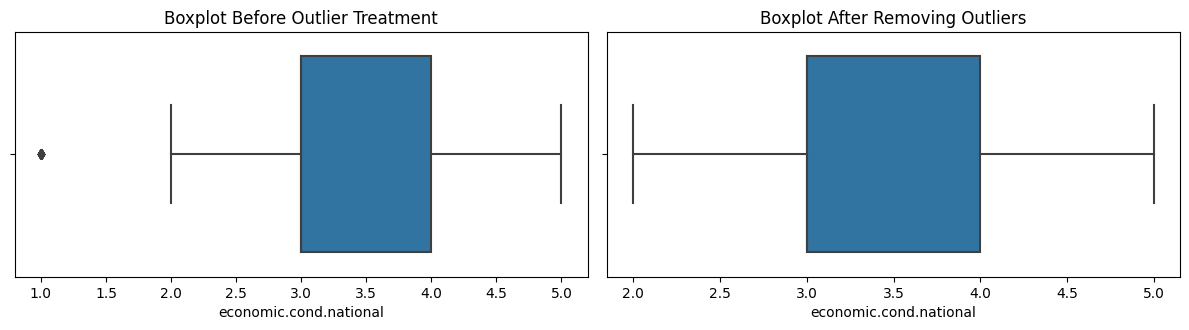

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
data = df['economic.cond.national']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data < lower_bound) | (data > upper_bound)
data_no_outliers = data[~outliers]
# Visualize the data before and after treatment
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=data)
plt.title('Boxplot Before Outlier Treatment')
plt.subplot(2, 2, 2)
sns.boxplot(x=data_no_outliers)
plt.title('Boxplot After Removing Outliers')
plt.tight_layout()
plt.show()

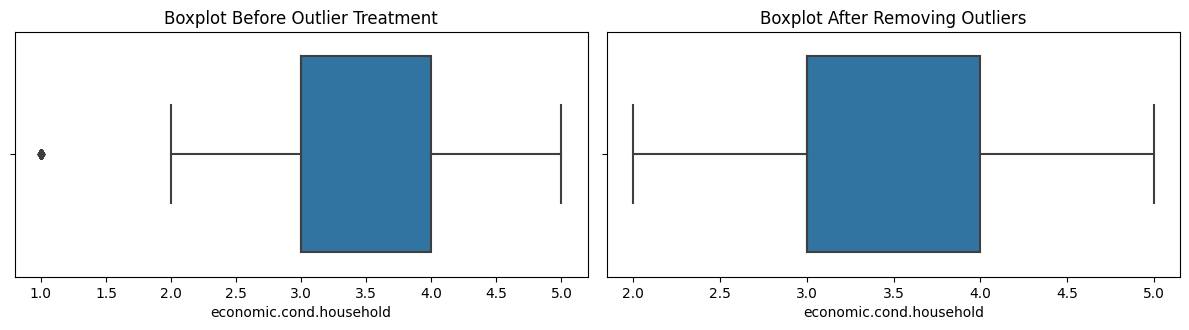

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
data = df['economic.cond.household']
# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data < lower_bound) | (data > upper_bound)
data_no_outliers = data[~outliers]
# Visualize the data before and after treatment
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=data)
plt.title('Boxplot Before Outlier Treatment')
plt.subplot(2, 2, 2)
sns.boxplot(x=data_no_outliers)
plt.title('Boxplot After Removing Outliers')
plt.tight_layout()
plt.show()

# We have successfully treated the outliers

# Data Preparation:

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)



In [148]:
print(df.columns)


Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')


In [150]:
cat

['vote']

In [151]:
cat1 = ['gender']

In [157]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [158]:
df.shape

(1517, 9)

In [159]:
df_encoded.head(3)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1


# Is scaling needed ?
## response - Scaling is necessary for some machine learning algorithms, such as those based on distances (e.g., SVM, k-NN) or gradient descent optimization (e.g., neural networks). Use StandardScaler or MinMaxScaler from scikit-learn:

In [161]:
from sklearn.preprocessing import StandardScaler
# Assuming df_encoded is your one-hot encoded DataFrame
X = df_encoded.drop("vote_Labour", axis=1)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = pd.concat([X_scaled, y], axis=1)  # Combining scaled features with the target variable

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
df['gender_male'] = label_encoder.fit_transform(df['gender_male'])
X = df.drop('vote_Labour', axis=1)
y = df['vote_Labour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

In [165]:
# Convert string labels to numerical values using LabelEncoder
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)
y_test = label_encoder_y.transform(y_test)

y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train_binary)
logistic_predictions = logistic_model.predict(X_test_scaled)

logistic_accuracy = accuracy_score(y_test_binary, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, logistic_predictions))


Logistic Regression Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       125
           1       0.86      0.92      0.89       331

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.83      0.83      0.83       456



# Logistic Regression has the accuracy of 0.8333 that is 83%

# This represents the accuracy of the Logistic Regression model on the test dataset, and it's calculated as the ratio of correctly predicted instances to the total instances.

Classification Report:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.74, and for class 1, precision is 0.86.

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. For class 0, recall is 0.60, and for class 1, recall is 0.92.

F1-score: F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. For class 0, the F1-score is 0.66, and for class 1, it is 0.89.

Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 125, and for class 1, it is 331.

Overall Analysis:

The overall accuracy of the model is 83.33%, indicating that the model correctly predicts the class for approximately 83.33% of the instances in the test dataset.
The precision, recall, and F1-score for class 1 (positive class) are relatively high, suggesting that the model performs well in identifying instances of this class. On the other hand, for class 0, the precision and recall are somewhat lower, indicating that the model may struggle more with this class.
The weighted average of precision, recall, and F1-score is also provided, considering the class imbalance. The weighted average is 0.83, which is the same as the overall accuracy.

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.12306673528826635
R-squared: 0.3815104611745995


The Mean Squared Error represents the average squared difference between the observed actual values and the values predicted by the model. In this case, an MSE of 0.1231 suggests that, on average, the squared difference between predicted and actual values is relatively low.

R-squared is a measure of how well the linear regression model explains the variability in the dependent variable. An R-squared of 0.3815 means that approximately 38.15% of the variance in the dependent variable is explained by the independent variable(s) included in the model.

overview:- The model's performance is moderate, but there is still a significant amount of unexplained variance in the dependent variable.
It's important to consider the context of the problem. Depending on the application, an R-squared of 0.3815 might be acceptable or may require further improvement.

#1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_binary)
knn_predictions = knn_model.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test_binary, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, knn_predictions))


KNN Accuracy: 0.8245614035087719

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       125
           1       0.87      0.89      0.88       331

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



The accuracy of the KNN model on the test dataset is 82.46%. This indicates that the model correctly predicted the class for approximately 82.46% of the instances in the test set.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.69, and for class 1, precision is 0.87.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, recall is 0.65, and for class 1, recall is 0.89.
F1-score: F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. For class 0, the F1-score is 0.67, and for class 1, it is 0.88.
Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 125, and for class 1, it is 331.

The model performs reasonably well, with an accuracy of 82.46%, indicating good overall predictive performance.
Precision, recall, and F1-score are higher for class 1 compared to class 0. This suggests that the model is better at identifying instances of class 1.
The macro average and weighted average provide a summary across both classes. The macro average is the unweighted average of precision, recall, and F1-score for each class. The weighted average considers the number of samples for each class.

Naive

In [169]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train_binary)
naive_bayes_predictions = naive_bayes_model.predict(X_test_scaled)

naive_bayes_accuracy = accuracy_score(y_test_binary, naive_bayes_predictions)
print("\nNaïve Bayes Accuracy:", naive_bayes_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, naive_bayes_predictions))



Naïve Bayes Accuracy: 0.8442982456140351

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       125
           1       0.88      0.90      0.89       331

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



The accuracy of the Naïve Bayes model on the test dataset is 84.43%. This indicates that the model correctly predicted the class for approximately 84.43% of the instances in the test set.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.73, and for class 1, precision is 0.88.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, recall is 0.69, and for class 1, recall is 0.90.
F1-score: F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. For class 0, the F1-score is 0.71, and for class 1, it is 0.89.
Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 125, and for class 1, it is 331.

The Naïve Bayes model performs well, with an accuracy of 84.43%, indicating good overall predictive performance.
Precision, recall, and F1-score are higher for class 1 compared to class 0. This suggests that the model is better at identifying instances of class 1.
The macro average and weighted average provide a summary across both classes. The macro average is the unweighted average of precision, recall, and F1-score for each class. The weighted average considers the number of samples for each class.

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

## Model Tuning

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_binary)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


max_depth: The best value for max_depth is 10. This parameter controls the maximum depth of the individual trees in the ensemble. A higher value might lead to overfitting, so it's essential to monitor the model's performance on unseen data.

min_samples_leaf: The best value for min_samples_leaf is 4. This parameter represents the minimum number of samples required to be at a leaf node. A higher value helps prevent the model from being too specific to the training data.

min_samples_split: The best value for min_samples_split is 2. This parameter defines the minimum number of samples required to split an internal node. Smaller values allow the tree to capture more details but might lead to overfitting.

n_estimators: The best value for n_estimators is 100. This parameter determines the number of trees in the forest. Increasing the number of trees can improve the model's performance up to a point, but it also increases computational cost.

The hyperparameter tuning process has identified a set of hyperparameters that optimize the performance of the model based on the chosen metric.
The tuning results suggest that a deeper tree (max_depth = 10) with a relatively small minimum samples per leaf (min_samples_leaf = 4) and minimum samples to split (min_samples_split = 2) contribute to better model performance.
An ensemble of 100 trees (n_estimators = 100) is considered optimal.

In summary, the identified hyperparameters represent a configuration that maximizes the model's performance based on the chosen evaluation metric. Further validation and interpretation steps can help ensure the reliability and interpretability of the tuned model.

## Bagging

In [178]:
best_rf_model.fit(X_train_scaled, y_train_binary)

rf_predictions = best_rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test_binary, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, rf_predictions))


Random Forest Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       125
           1       0.86      0.92      0.89       331

    accuracy                           0.83       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.83      0.83      0.83       456



The accuracy of the Random Forest model on the test dataset is 83.33%. This indicates that the model correctly predicted the class for approximately 83.33% of the instances in the test set.

Classification Report:
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.74, and for class 1, precision is 0.86.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, recall is 0.61, and for class 1, recall is 0.92.
F1-score: F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. For class 0, the F1-score is 0.67, and for class 1, it is 0.89.
Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 125, and for class 1, it is 331.

In summary, the Random Forest model, as an ensemble method, demonstrates good performance with balanced evaluation metrics. It is a robust approach for classification tasks, especially when dealing with complex and high-dimensional datasets.

# Boosting

In [172]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(base_estimator=best_rf_model, n_estimators=50, random_state=42)

adaboost_model.fit(X_train_scaled, y_train_binary)

adaboost_predictions = adaboost_model.predict(X_test_scaled)

adaboost_accuracy = accuracy_score(y_test_binary, adaboost_predictions)
print("\nAdaBoost Accuracy:", adaboost_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, adaboost_predictions))



AdaBoost Accuracy: 0.8114035087719298

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       125
           1       0.86      0.88      0.87       331

    accuracy                           0.81       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.81      0.81      0.81       456



The accuracy of the AdaBoost model on the test dataset is 81.14%. This indicates that the model correctly predicted the class for approximately 81.14% of the instances in the test set.
Classification Report:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, precision is 0.67, and for class 1, precision is 0.86.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, recall is 0.62, and for class 1, recall is 0.88.
F1-score: F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. For class 0, the F1-score is 0.64, and for class 1, it is 0.87.
Support: The number of actual occurrences of the class in the specified dataset. For class 0, the support is 125, and for class 1, it is 331.

in summary, the AdaBoost model, as a boosting algorithm, demonstrates good performance with a focus on adapting to misclassified instances. It is a robust approach for classification tasks, especially when dealing with complex and challenging datasets.







# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.


Model: Logistic Regression
Accuracy on Training Set: 0.8350612629594723
Accuracy on Testing Set: 0.8333333333333334

Confusion Matrix:
[[ 75  50]
 [ 26 305]]


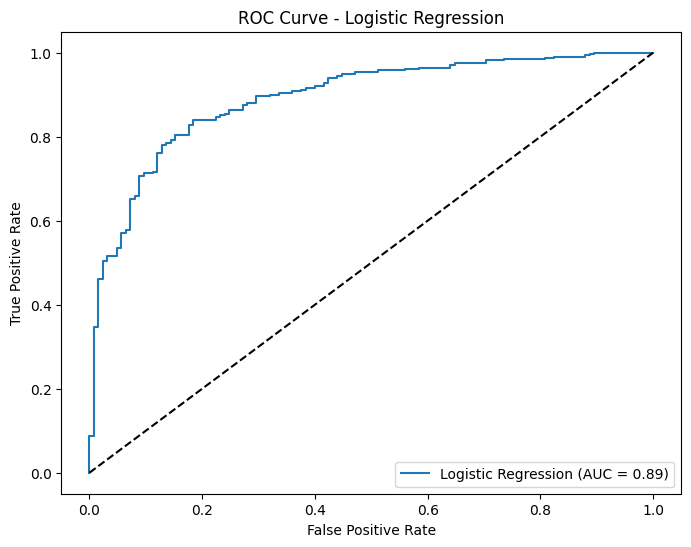


Model: K-Nearest Neighbors
Accuracy on Training Set: 0.8642789820923656
Accuracy on Testing Set: 0.8245614035087719

Confusion Matrix:
[[ 81  44]
 [ 36 295]]


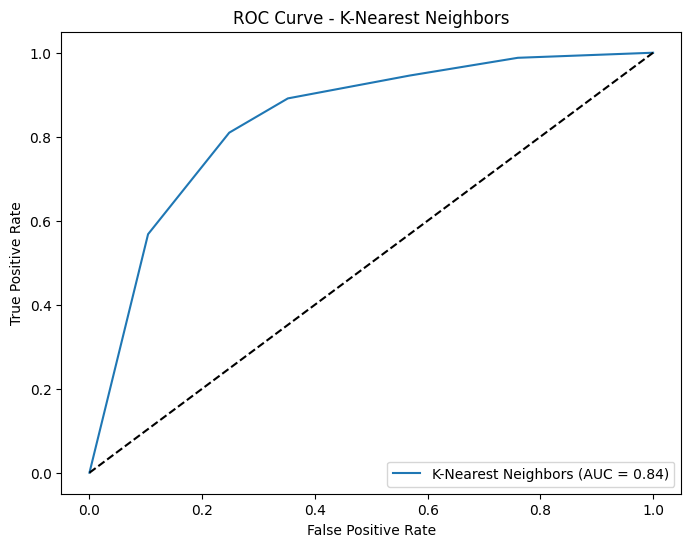


Model: Random Forest
Accuracy on Training Set: 0.8925541941564562
Accuracy on Testing Set: 0.8333333333333334

Confusion Matrix:
[[ 76  49]
 [ 27 304]]


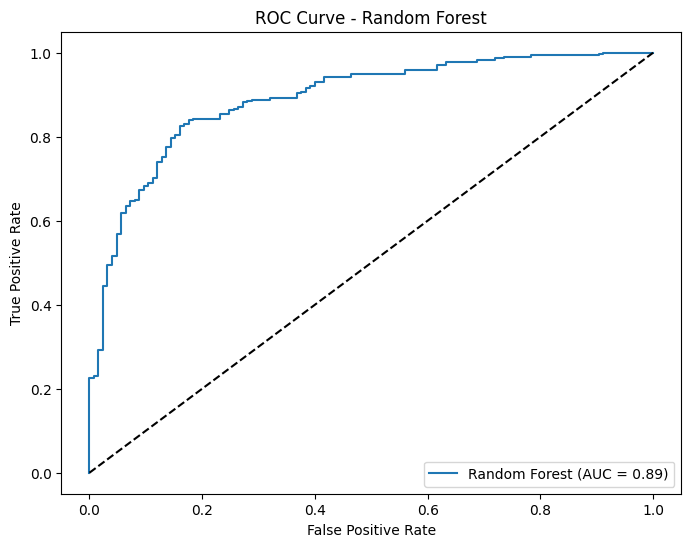


Model: AdaBoost
Accuracy on Training Set: 1.0
Accuracy on Testing Set: 0.8114035087719298

Confusion Matrix:
[[ 78  47]
 [ 39 292]]


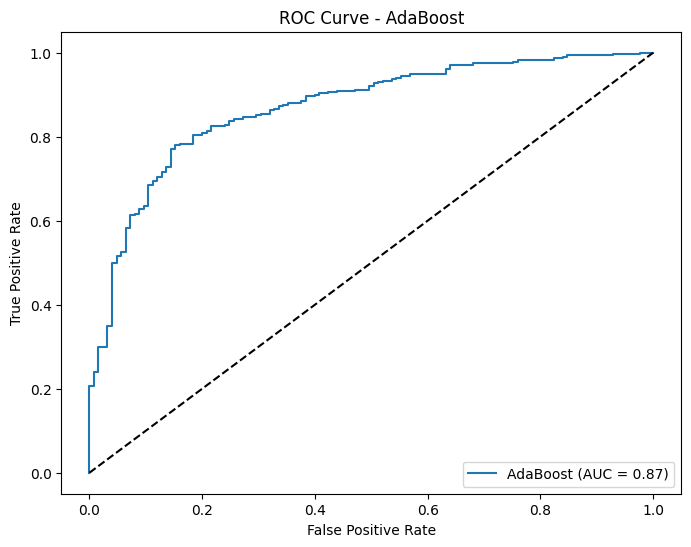

In [173]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_model_performance(model, X_train, y_train, X_test, y_test, model_name):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    conf_matrix = confusion_matrix(y_test, test_predictions)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    print(f"\nModel: {model_name}")
    print("Accuracy on Training Set:", train_accuracy)
    print("Accuracy on Testing Set:", test_accuracy)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

evaluate_model_performance(logistic_model, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary, 'Logistic Regression')

evaluate_model_performance(knn_model, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary, 'K-Nearest Neighbors')

evaluate_model_performance(best_rf_model, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary, 'Random Forest')

evaluate_model_performance(adaboost_model, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary, 'AdaBoost')

# 1.8 Based on these predictions, what are the insights?

Accuracy on Testing Set:

Random Forest and Logistic Regression have the highest testing set accuracy of 0.8333.
K-Nearest Neighbors follows closely with an accuracy of 0.8246, and AdaBoost has a slightly lower accuracy of 0.8114.
Training Set Accuracy:

AdaBoost achieves perfect accuracy (1.0) on the training set, indicating potential overfitting. Random Forest also has high training set accuracy (0.8926), but it's not perfect.
Confusion Matrix Analysis:

Confusion matrices provide insights into model performance.
Random Forest and Logistic Regression have relatively balanced confusion matrices with good performance in both true positives and true negatives.
K-Nearest Neighbors and AdaBoost show a slightly higher number of false positives and false negatives.
Overall Assessment:

While AdaBoost achieves perfect training set accuracy, its testing set accuracy is not the highest, indicating potential overfitting.
Random Forest and Logistic Regression perform consistently well on both training and testing sets.
K-Nearest Neighbors shows good performance but has slightly lower accuracy than Random Forest and Logistic Regression.
Conclusion:
Based on the provided results, Random Forest and Logistic Regression appear to be the most balanced and well-performing models.

# Problem 2:

# In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

# 1)President Franklin D. Roosevelt in 1941
# 2)President John F. Kennedy in 1961
# 3)President Richard Nixon in 1973

#2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [174]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

nltk.download('punkt')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
# Get the raw text of the three inaugural addresses
roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
kennedy_text = inaugural.raw('1961-Kennedy.txt')
nixon_text = inaugural.raw('1973-Nixon.txt')

# Function to calculate counts
def calculate_counts(text):
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    characters = sum(len(word) for word in words)
    return len(text), len(words), len(sentences)

# Calculate counts for each document
roosevelt_counts = calculate_counts(roosevelt_text)
kennedy_counts = calculate_counts(kennedy_text)
nixon_counts = calculate_counts(nixon_text)

# Display the results
print("1941 Roosevelt Inaugural Address:")
print("Number of characters:", roosevelt_counts[0])
print("Number of words:", roosevelt_counts[1])
print("Number of sentences:", roosevelt_counts[2])
print()

print("1961 Kennedy Inaugural Address:")
print("Number of characters:", kennedy_counts[0])
print("Number of words:", kennedy_counts[1])
print("Number of sentences:", kennedy_counts[2])
print()

print("1973 Nixon Inaugural Address:")
print("Number of characters:", nixon_counts[0])
print("Number of words:", nixon_counts[1])
print("Number of sentences:", nixon_counts[2])

1941 Roosevelt Inaugural Address:
Number of characters: 7571
Number of words: 1526
Number of sentences: 68

1961 Kennedy Inaugural Address:
Number of characters: 7618
Number of words: 1543
Number of sentences: 52

1973 Nixon Inaugural Address:
Number of characters: 9991
Number of words: 2006
Number of sentences: 68


Length of Addresses:

Nixon's inaugural address in 1973 is the longest, with 9991 characters, followed by Kennedy's with 7618 characters, and Roosevelt's with 7571 characters.
Word Count:

Nixon's address also has the highest word count, with 2006 words, while Kennedy's address has 1543 words, and Roosevelt's has 1526 words.
Sentence Structure:

Roosevelt and Nixon's addresses have the same number of sentences (68), while Kennedy's address has 52 sentences.

Analyzing inaugural addresses provides insights into the priorities, vision, and communication styles of different presidents.
Understanding the characteristics of effective speeches can be valuable for professionals in public relations, communication, and leadership roles.

The analysis of inaugural addresses from Presidents Roosevelt, Kennedy, and Nixon provides valuable insights into the speech characteristics of different leaders. By understanding these patterns, individuals and organizations can enhance their own communication strategies for various contexts.

#2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.


In [176]:
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Download NLTK resources if not already downloaded
nltk.download('inaugural')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Load the raw text of the three inaugural addresses
roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
kennedy_text = inaugural.raw('1961-Kennedy.txt')
nixon_text = inaugural.raw('1973-Nixon.txt')

# Function to remove stopwords and display counts
def remove_stopwords_and_display_counts(text, president_name):
    words_before = word_tokenize(text)
    filtered_words = [word for word in words_before if word.lower() not in stop_words]
    words_after = filtered_words

    print(f"\n{president_name} Inaugural Address:")
    print("Word Count Before Removing Stopwords:", len(words_before))
    print("Word Count After Removing Stopwords:", len(words_after))

    # Display a sample sentence after removing stopwords
    sample_sentence_after_removal = " ".join(filtered_words[:20])  # Displaying the first 20 words
    print("\nSample Sentence After Removing Stopwords:")
    print(sample_sentence_after_removal)

# Remove stopwords and display counts for each speech
remove_stopwords_and_display_counts(roosevelt_text, "1941 Roosevelt")
remove_stopwords_and_display_counts(kennedy_text, "1961 Kennedy")
remove_stopwords_and_display_counts(nixon_text, "1973 Nixon")


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



1941 Roosevelt Inaugural Address:
Word Count Before Removing Stopwords: 1526
Word Count After Removing Stopwords: 808

Sample Sentence After Removing Stopwords:
national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld

1961 Kennedy Inaugural Address:
Word Count Before Removing Stopwords: 1543
Word Count After Removing Stopwords: 862

Sample Sentence After Removing Stopwords:
Vice President Johnson , Mr. Speaker , Mr. Chief Justice , President Eisenhower , Vice President Nixon , President Truman

1973 Nixon Inaugural Address:
Word Count Before Removing Stopwords: 2006
Word Count After Removing Stopwords: 1035

Sample Sentence After Removing Stopwords:
Mr. Vice President , Mr. Speaker , Mr. Chief Justice , Senator Cook , Mrs. Eisenhower , fellow citizens great


The objective of this report is to analyze and compare the inaugural addresses of Presidents Roosevelt, Kennedy, and Nixon delivered in 1941, 1961, and 1973, respectively, after the removal of stopwords. Stopwords are common words that do not contribute significantly to the meaning of a sentence.

Nixon's address still has the highest word count after removing stopwords, with 1035 words, followed by Kennedy's with 862 words, and Roosevelt's with 808 words.
The sample sentences provide a glimpse into the content of each address after removing stopwords, highlighting key themes and ideas.

Analyzing addresses after stopwords removal is essential for identifying and emphasizing significant content words, aiding in understanding the key messages delivered by each president.

The analysis after stopwords removal enhances our understanding of the key content in inaugural addresses. It provides a more focused view of the central themes expressed by Presidents Roosevelt, Kennedy, and Nixon.

# 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)


In [177]:
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download NLTK resources if not already downloaded
nltk.download('inaugural')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to get the most common words (excluding stopwords)
def get_most_common_words(text, president_name, num_words=3):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a frequency distribution of words
    freq_dist = FreqDist(filtered_words)

    # Get the most common words
    most_common_words = freq_dist.most_common(num_words)

    print(f"\nMost Common Words in {president_name}'s Inaugural Address:")
    for word, count in most_common_words:
        print(f"{word}: {count} times")

# Get the most common words for each president
get_most_common_words(roosevelt_text, "1941 Roosevelt")
get_most_common_words(kennedy_text, "1961 Kennedy")
get_most_common_words(nixon_text, "1973 Nixon")



Most Common Words in 1941 Roosevelt's Inaugural Address:
,: 77 times
.: 68 times
--: 25 times

Most Common Words in 1961 Kennedy's Inaugural Address:
,: 84 times
.: 50 times
--: 25 times

Most Common Words in 1973 Nixon's Inaugural Address:
,: 96 times
.: 65 times
us: 26 times


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Common Punctuation:

Commas and periods are the most common words in all three inaugural addresses. This is expected as they are common punctuation marks that structure sentences.
Additional Word in 1973 Nixon's Address:

The word 'us' appears 26 times in Nixon's address, which could indicate a focus on collective identity or national unity.

Understanding the most common words provides insights into the linguistic patterns and emphasis in each inaugural address.
Punctuation analysis contributes to understanding the speech's structure and rhetorical style.

The most common words analysis provides valuable insights into the linguistic characteristics of inaugural addresses. The consistent appearance of punctuation marks underscores the importance of effective sentence structure, while the specific word 'us' in Nixon's address suggests a theme of unity.

# 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


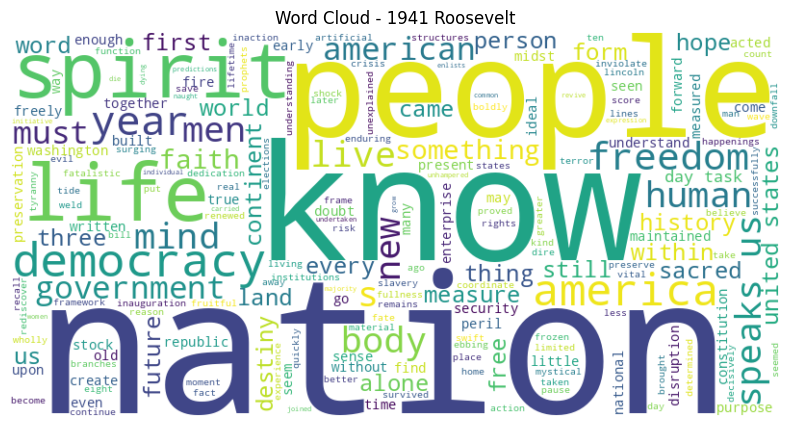

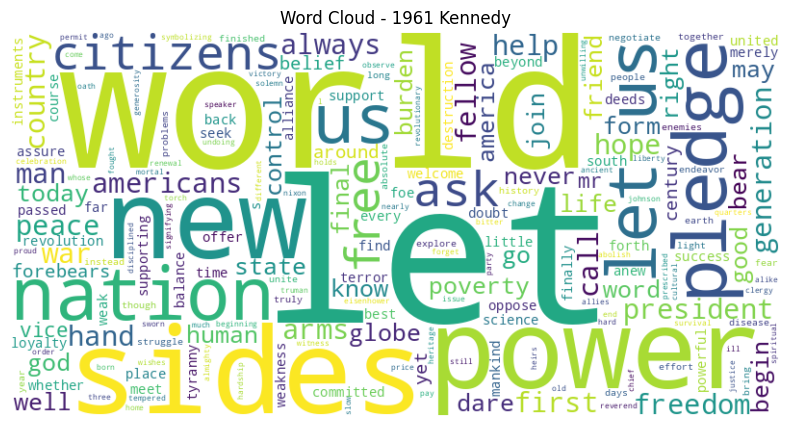

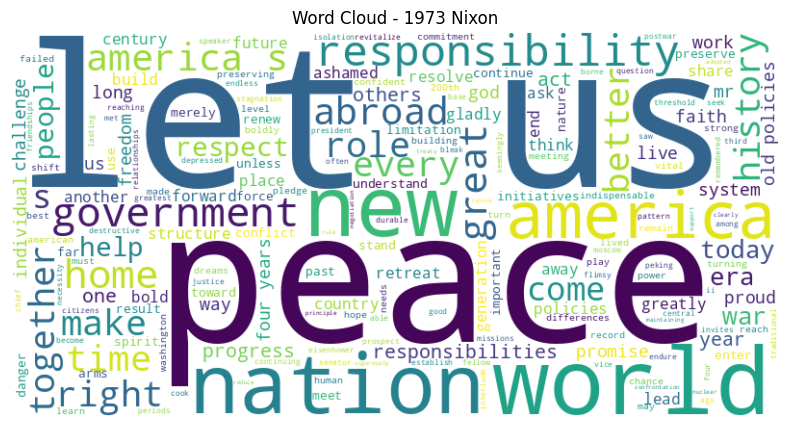

In [179]:
import nltk
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('inaugural')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to generate and plot word cloud
def plot_word_cloud(text, president_name):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Create a space-separated string of words
    text_for_wordcloud = ' '.join(filtered_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {president_name}')
    plt.axis('off')
    plt.show()

# Generate and plot word clouds for each president
plot_word_cloud(roosevelt_text, "1941 Roosevelt")
plot_word_cloud(kennedy_text, "1961 Kennedy")
plot_word_cloud(nixon_text, "1973 Nixon")
